# AlgorithmicToolbox Divide and Conquer

## 1. Binary Search

In [ ]:
%%writefile ex1.py
def binary_search(keys, query):
    r = len(keys) - 1
    l = 0
    
    while (l <= r):
        mid = l + ((r-l)//2)
        if query > keys[mid]:
            l = mid + 1
        elif query < keys[mid]:
            r = mid - 1
        else:
            return mid

    return -1
            
    

if __name__ == '__main__':
    num_keys = int(input())
    input_keys = list(map(int, input().split()))
    assert len(input_keys) == num_keys

    num_queries = int(input())
    input_queries = list(map(int, input().split()))
    assert len(input_queries) == num_queries

    for q in input_queries:
        print(binary_search(input_keys, q), end=' ')

Writing ex1.py


In [ ]:
%%writefile test1.txt
5
1 2 3 4 5
5
1 2 3 4 5

Writing test1.txt


In [ ]:
! python ex1.py < test1.txt

0 1 2 3 4 

## 2. Binary Search with Duplicates

In [ ]:
%%writefile ex2.py
def binary_search(keys, query):
    r = len(keys) - 1
    l = 0
    
    while (l <= r):
        mid = l + ((r-l)//2)
        if query == keys[l]:
            return l

        if query > keys[mid]:
            l = mid + 1
        elif query < keys[mid]:
            r = mid - 1
        else:
            r = mid
            l += 1

    return -1

if __name__ == '__main__':
    num_keys = int(input())
    input_keys = list(map(int, input().split()))
    assert len(input_keys) == num_keys

    num_queries = int(input())
    input_queries = list(map(int, input().split()))

    for q in input_queries:
        print(binary_search(input_keys, q), end=' ')


Writing ex2.py


In [ ]:
%%writefile test2.txt
8
1 2 3 4 5 6 7 8
8
10 10 10 10 10 10 10 10

Writing test2.txt


In [ ]:
! python ex2.py < test2.txt

-1 -1 -1 -1 -1 -1 -1 -1 

## 3. Majority Element

In [ ]:
%%writefile ex3.py
import sys


def get_majority_element(arr, n) :
     
    # sort the array in O(nlogn)
    arr.sort()  
    count, max_ele, temp, f = 1, -1, arr[0], 0
    for i in range(1, n) :
         
        # increases the count if the same element occurs
        # otherwise starts counting new element
        if(temp == arr[i]) :
            count += 1
        else :
            count = 1
            temp = arr[i]
             
        # sets maximum count
        # and stores maximum occurred element so far
        # if maximum count becomes greater than n/2
        # it breaks out setting the flag
        if(max_ele < count) :
            max_ele = count
            ele = arr[i]
             
            if(max_ele > (n//2)) :
                f = 1
                break
             
    # returns maximum occurred element
    # if there is no such element, returns -1
    if f == 1 :
        return ele
    else :
        return -1
        

if __name__ == '__main__':
    input = sys.stdin.read()
    n, *a = list(map(int, input.split()))
   
    if  get_majority_element(a, n) != -1:
        print(1)
    else:
        print(0)


Writing ex3.py


In [ ]:
%%writefile test3.txt
4
1 2 3 4

Writing test3.txt


In [ ]:
! python ex3.py < test3.txt

0


## 4. Improving QuickSort

In [ ]:
%%writefile ex4.py
import sys
import random
def partition3(A, l, r):
    lt = l  
    i = l   
    gt = r  
    pivot = A[l]   
                    
    while i <= gt:      
        if A[i] < pivot:
            A[lt], A[i] = A[i], A[lt]
            lt += 1
            i += 1
        elif A[i] > pivot:
            A[i], A[gt] = A[gt], A[i]
            gt -= 1
        else:
            i += 1
            
    return lt, gt



def quick_sort(A, l, r):

    if l >= r: 
        return
    k = random.randint(l, r)
    A[k], A[l] = A[l], A[k]
    
    lt, gt = partition3(A, l, r)
    quick_sort(A, l, lt - 1)
    quick_sort(A, gt + 1, r)  

if __name__ == '__main__':
    input = sys.stdin.read()
    n, *a = list(map(int, input.split()))
    quick_sort(a, 0, n - 1)
    for x in a:
        print(x, end=' ')


Writing ex4.py


In [ ]:
%%writefile test4.txt
5
2 3 9 2 2

Writing test4.txt


In [ ]:
! python ex4.py < test4.txt

2 2 2 3 9 

## 6. Organizing a Lottery

In [ ]:
%%writefile ex6.py
import sys

def fast_count_segments(starts, ends, points):

  start_label, point_label, end_label = 0, 1, 2
  point_counts = [0] * len(points)
  point_map = {}
  
  combined = []
  for s in starts:
    combined.append((s, start_label))
  for e in ends:
    combined.append((e, end_label))
  for i, p in enumerate(points):
    combined.append((p, point_label))
    # Since the points will be sorted, use a dictionary that maps a point to its index / indices
    if (p not in point_map):
        point_map[p] = [i]
    else:
        point_map[p].append(i) # Points are not unique. Hence they can have many indices

  sorted_array = sorted(combined, key=lambda c: (c[0], c[1])) 

  count = 0 # Keeps track of the number of segments encountered on the number line
  for item in sorted_array:
      # A starting point indicates the start of a segment
      if item[1] == start_label:
          count += 1
      # An ending point indicates the end of a segment
      elif item[1] == end_label:
          count -= 1
      elif item[1] == point_label:
          indices = point_map[item[0]]
          for i in indices:
              point_counts[i] = count
    
  return point_counts


if __name__ == '__main__':
    input = sys.stdin.read()
    data = list(map(int, input.split()))
    n = data[0]
    m = data[1]
    starts = data[2:2 * n + 2:2]
    ends   = data[3:2 * n + 2:2]
    points = data[2 * n + 2:]
    #use fast_count_segments
    cnt = fast_count_segments(starts, ends, points)
    for x in cnt:
        print(x, end=' ')

Overwriting ex6.py


In [ ]:
%%writefile test6.txt
1 3
-10 10
-100 100 0

Overwriting test6.txt


In [ ]:
! python ex6.py < test6.txt

0 0 1 

## **Screenshots**

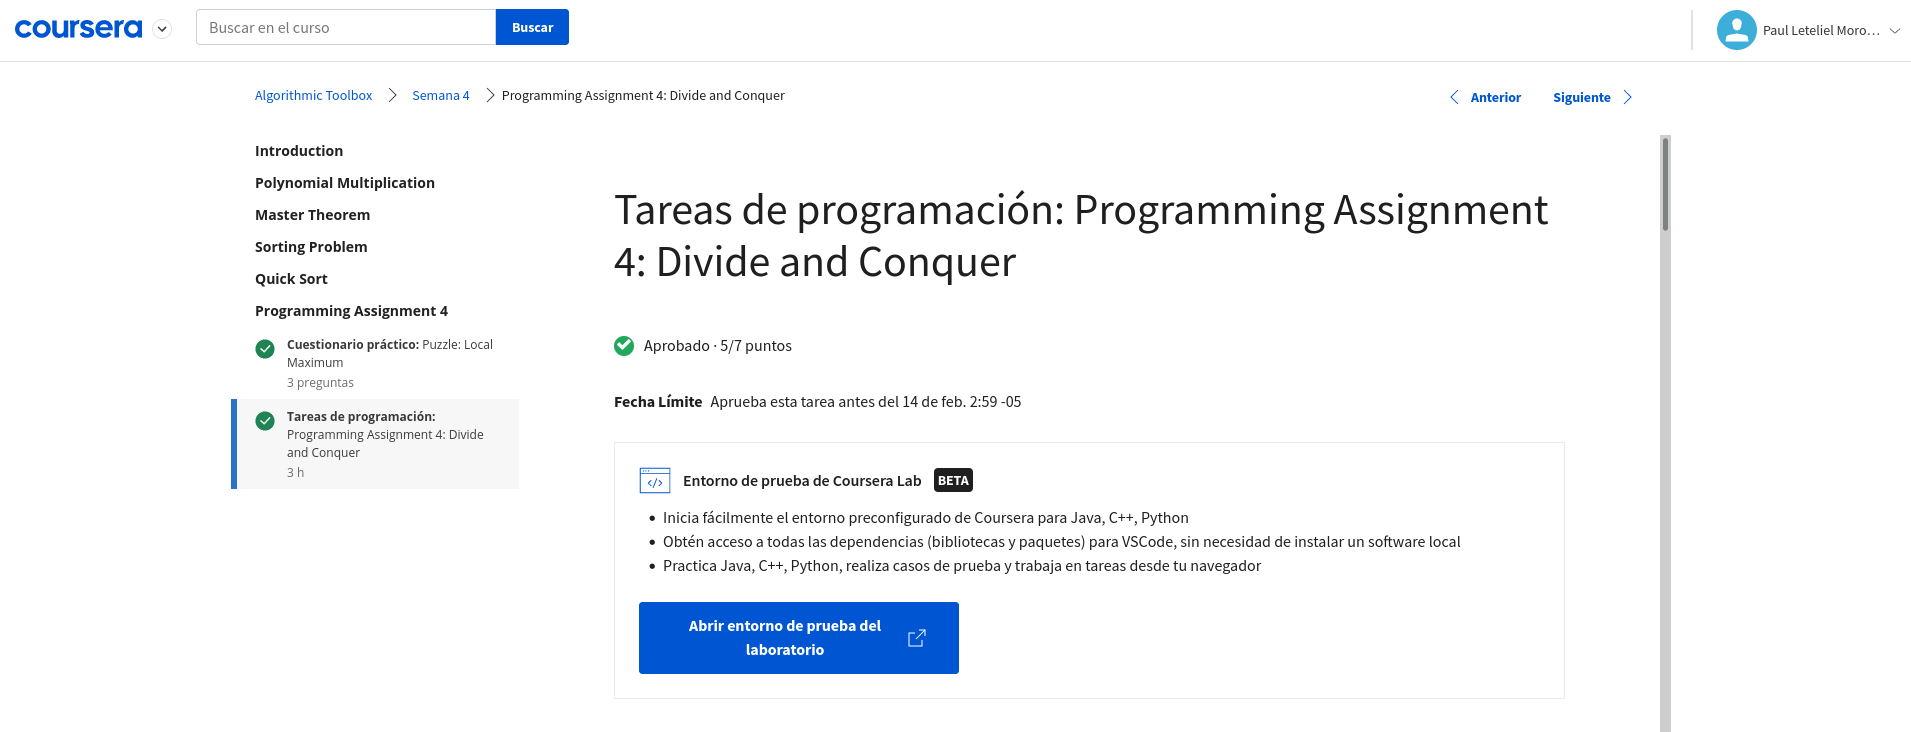

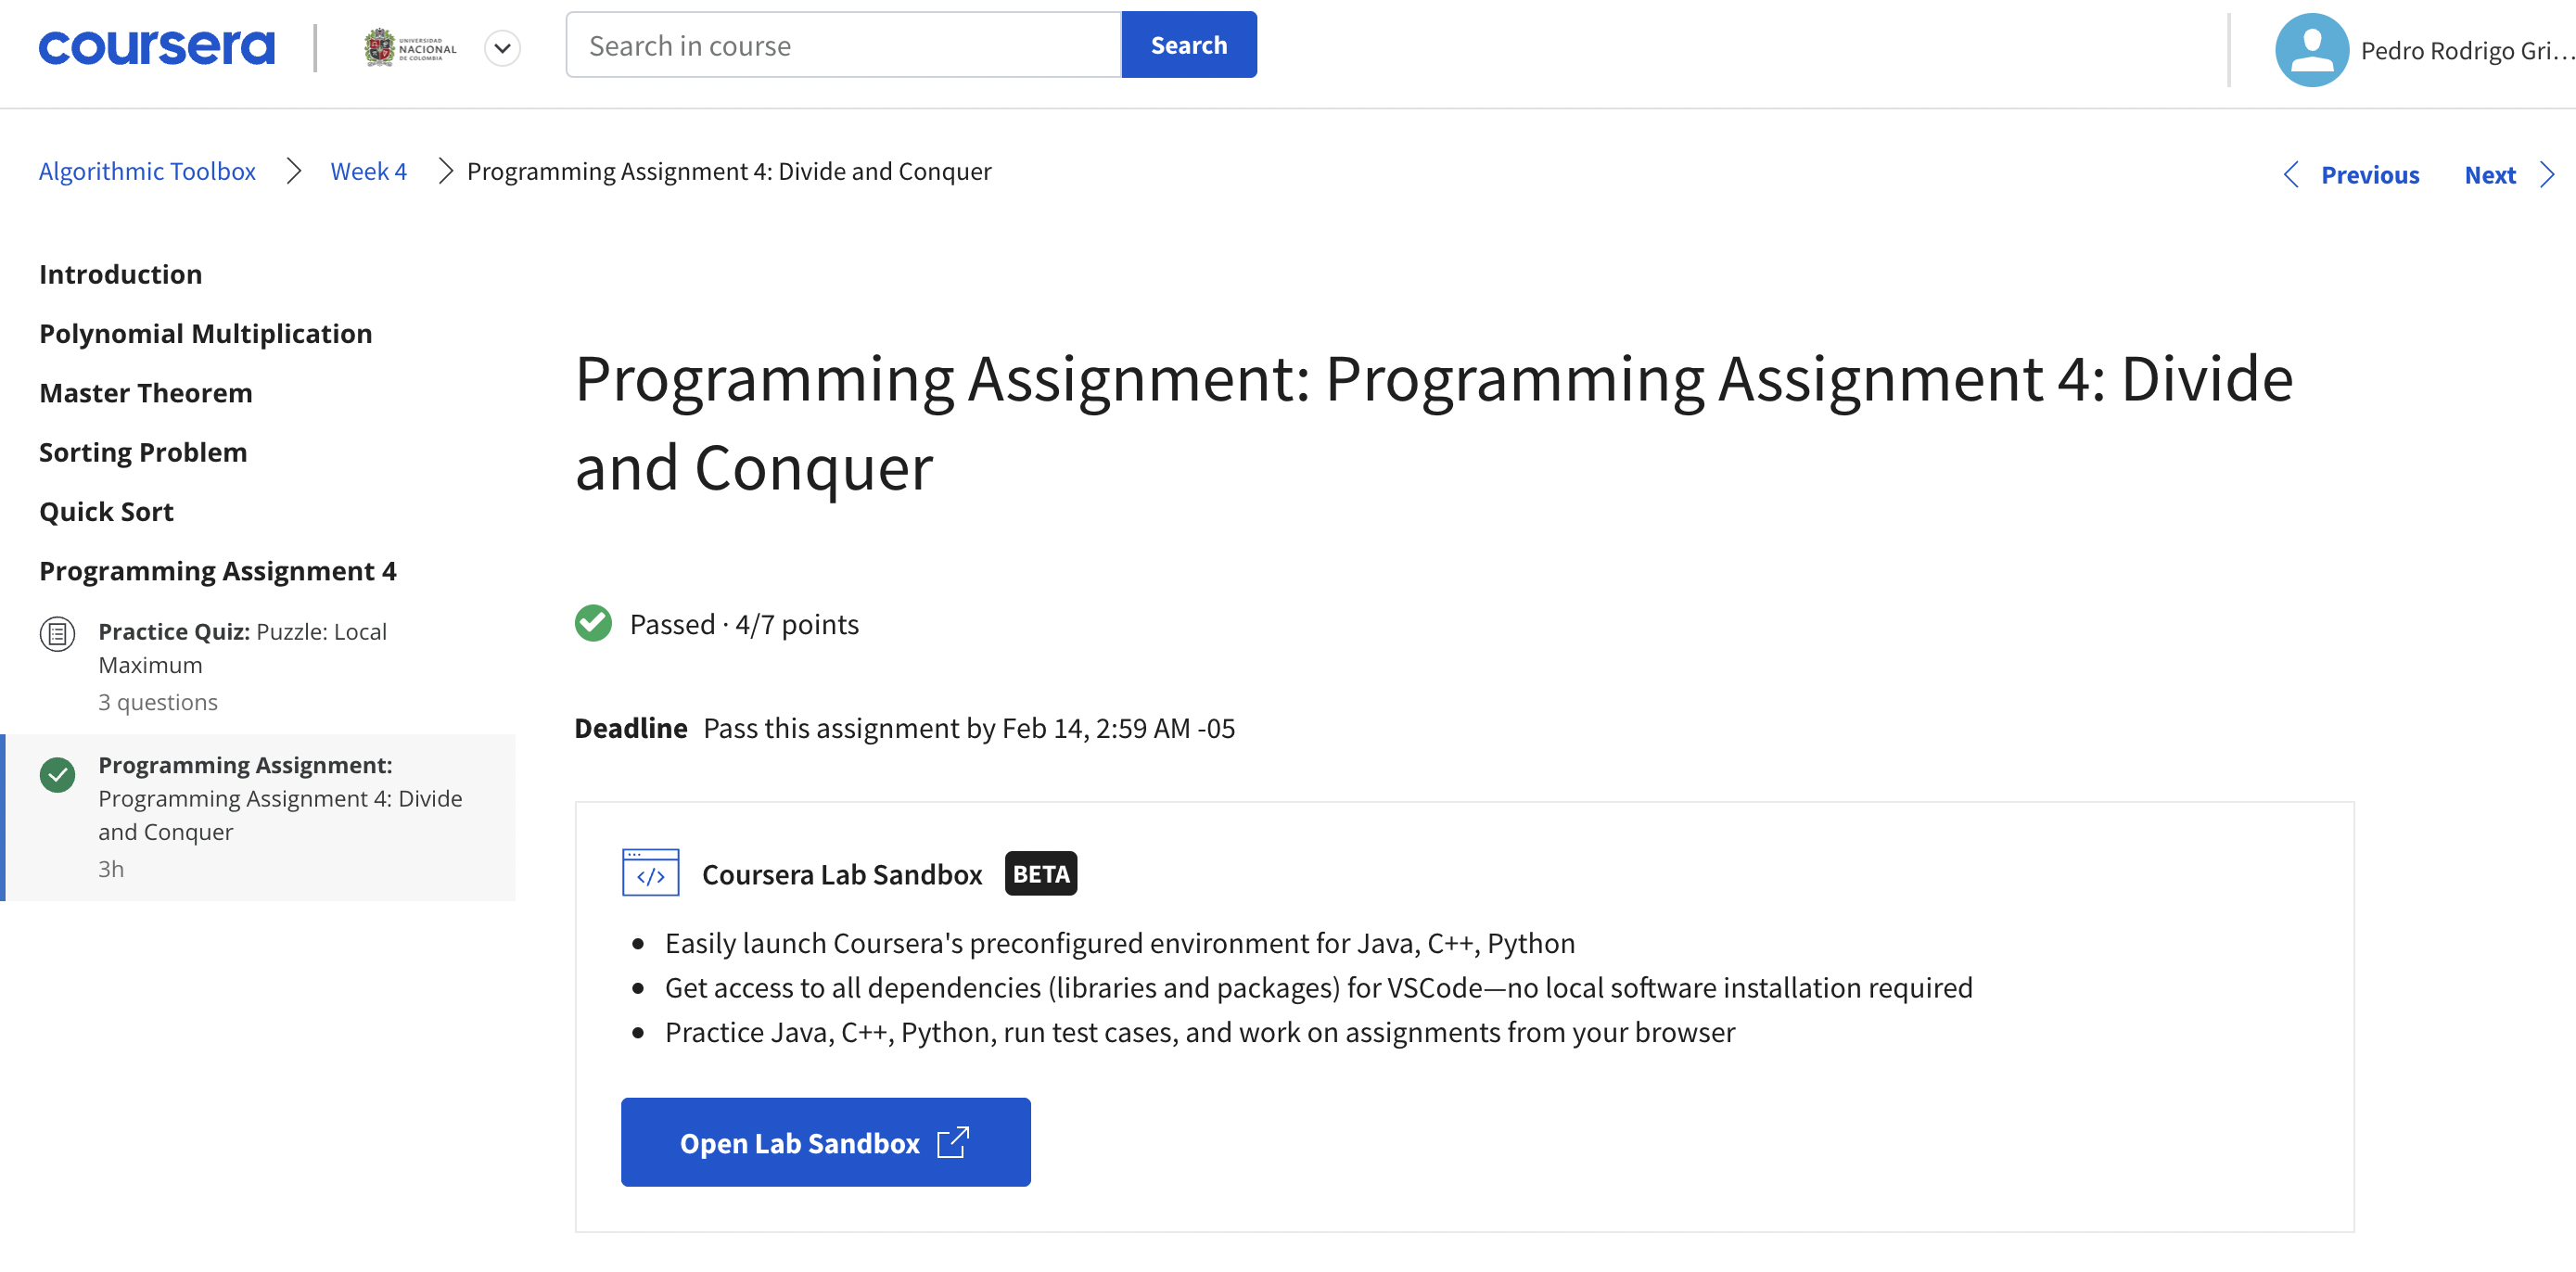